In [186]:
### Firas

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from fuzzywuzzy import fuzz, process
import seaborn as sns

# Business account

In [208]:
#Business Account
bus_account = pd.read_excel('Business Account.xlsx')
columns_to_keep = ['Business Account', 'Activity sector', 'City', 'Parent Business Account']
bus_account_f = bus_account[columns_to_keep]

bus_account_f = bus_account_f.rename(columns={'Business Account': 'Customer'})

bus_account_f

,Customer,Activity sector,City,Parent Business Account
0,C00001,"HEALTH - SOCIAL - Social, Associations, Founda...",LYON,NaN
1,C00002,NaN,Lyon,NaN
2,C00003,NaN,Non renseigné,NaN
3,C00004,"BUSINESS ADMINISTRATION - Consulting, Audit, A...",PARIS,NaN
4,C00005,NaN,Non renseigné,NaN
...,...,...,...,...
3478,C19916,"MEDIA - ARTS - SPORTS - Sports, Infrastructure...",Paris,NaN
3479,C19917,"HEALTH - SOCIAL - Social, Associations, Founda...",Saint Priest,NaN
3480,C19918,"COMMUNICATION - Marketing, Advertising, Commun...",Montréal - Paris - Toronto,NaN
3481,C19986,SECTEUR PUBLIC - Etat & ses établissements pub...,Bobigny,NaN


In [209]:
#Opportunities table cleaned with relevant data: Won and Oral agreement
opp_clean = pd.read_csv("opp_1.csv")
opp_clean = opp_clean.rename(columns={'Business Account': 'Customer'})
opp_clean

,Opportunity ID,Customer,Status,Stage,Estimated amount,Amount received,Difference,Class ID,Class,Programme financé
0,6387,C00037,New,Won,9000.00,0.0,-9000.00,PPRIV EVNT,Private partnership - Event,NaN
1,6386,C01254,New,Won,9000.00,0.0,-9000.00,PPRIV EVNT,Private partnership - Event,NaN
2,6365,C18115,Won,Won,150.00,0.0,-150.00,CAMP TER,Campus - Field,NaN
3,6346,C00510,New,Won,1047.81,0.0,-1047.81,PPRIV MEC,Private partnership - Patronage,Sport
4,6338,C00366,Won,Won,756.00,0.0,-756.00,CAMP SAL,Campus - Room,NaN
...,...,...,...,...,...,...,...,...,...,...
4069,5,C00036,Won,Won,1059.00,0.0,-1059.00,PPRIV MEC,Private partnership - Patronage,Non fléché
4070,4,C00024,Won,Won,7500.00,7500.0,0.00,PPRIV MEC,Private partnership - Patronage,Job dans la Ville
4071,3,C00011,Won,Won,35000.00,0.0,-35000.00,PPRIV MEC,Private partnership - Patronage,Job dans la Ville
4072,2,C00331,Won,Won,20000.00,0.0,-20000.00,PPRIV MEC,Private partnership - Patronage,Séjours et Camps


# Merging invoice & opportunities to get the difference between what has been paid and what was expected to be paid

In [257]:
#Invoice table 
invoice_opp = pd.read_excel('Invoice and Opportunities.xlsx')
invoice_opp = invoice_opp.drop(columns="Type")

invoice_opp = invoice_opp.groupby(['Customer', 'Opportunity ID', 'Date'])['Amount'].sum()
invoice_opp= pd.DataFrame(invoice_opp)
invoice_opp = invoice_opp.reset_index()
# invoice_opp = invoice_opp.drop("index", axis=1)

#Merging

merged_h = pd.merge(invoice_opp, opp_clean, on=["Opportunity ID", "Customer"], how='outer')
merged_h['Paid minus Estimated'] = merged_h['Amount'] - merged_h['Estimated amount'] 
merged_h

col_keeping =['Customer', 'Opportunity ID', 'Date', 'Paid minus Estimated', 'Stage', 'Status', 'Programme financé', 'Class', 'Amount', 'Estimated amount']
merged_h = merged_h[col_keeping]

#Delete lines that are not in common
merged_h = merged_h.dropna(subset=['Amount'])
merged_h

,Customer,Opportunity ID,Date,Paid minus Estimated,Stage,Status,Programme financé,Class,Amount,Estimated amount
0,C00001,1387,2021-02-25,0.0,Won,Won,NaN,Private partnership - Patronage,4800.0,4800.0
1,C00001,2554,2022-05-18,0.0,Won,Won,Réussite dans la Ville,Private partnership - Patronage,4800.0,4800.0
2,C00002,1588,2021-03-02,0.0,Won,Won,NaN,Private partnership - Apprenticeship tax,183.0,183.0
3,C00004,2631,2022-01-10,0.0,Won,Won,NaN,Private partnership - Event,10000.0,10000.0
4,C00004,3653,2022-04-26,0.0,Won,Won,NaN,Private partnership - Event,7000.0,7000.0
...,...,...,...,...,...,...,...,...,...,...
3018,C20904,5946,2023-07-24,NaN,NaN,NaN,NaN,NaN,194.0,NaN
3019,C20905,5947,2023-07-24,NaN,NaN,NaN,NaN,NaN,235.0,NaN
3020,C20913,5958,2023-09-04,NaN,NaN,NaN,NaN,NaN,640.0,NaN
3021,C20913,5958,2023-09-05,NaN,NaN,NaN,NaN,NaN,640.0,NaN


# Merging business account and opportunities

In [263]:
# Linking tables to map donors to answer "Who are the donors ?"
oppXbusaccount = pd.merge(merged_h, bus_account_f, on='Customer')

# Putting everything in capital letter and remove -
oppXbusaccount['City'] = oppXbusaccount['City'].str.upper()
oppXbusaccount['City'] = oppXbusaccount['City'].str.replace('-', ' ', regex=False)

oppXbusaccount = oppXbusaccount.dropna(subset=['City'])

#Identifying top performs and under performers. Top are >=0 and under <0
top_performers = oppXbusaccount[oppXbusaccount['Paid minus Estimated'] >=0]
under_performers = oppXbusaccount[oppXbusaccount['Paid minus Estimated'] <0]

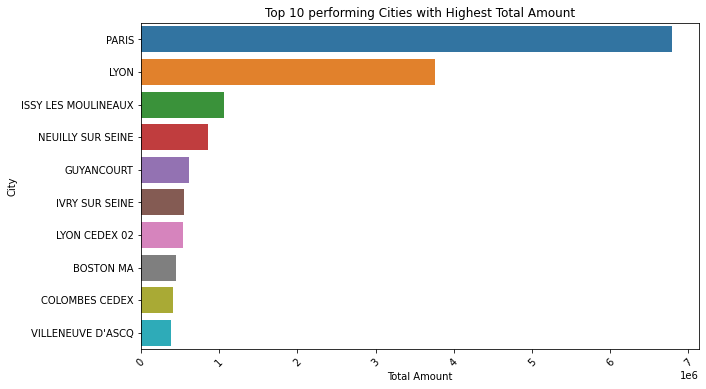

In [251]:
#Top performers
city_sum = top_performers.groupby("City")["Amount"].sum()

# Sort the cities by the total amount in descending order
sorted_city_sum = city_sum.sort_values(ascending=False)

# Select the top 10 cities with the highest amounts
top_10_cities = sorted_city_sum.head(10)

# Create a bar plot for the top 10 cities using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_cities.values, y=top_10_cities.index)
plt.xlabel('Total Amount')
plt.ylabel('City')
plt.title('Top 10 performing Cities with Highest Total Amount')
plt.xticks(rotation=45)
plt.show()

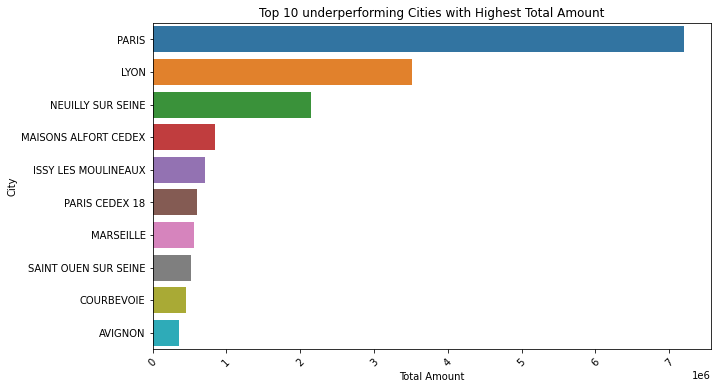

In [252]:
#Under performers
city_sum = under_performers.groupby("City")["Amount"].sum()

# Sort the cities by the total amount in descending order
sorted_city_sum = city_sum.sort_values(ascending=False)

# Select the top 10 cities with the highest amounts
top_10_cities = sorted_city_sum.head(10)

# Create a bar plot for the top 10 cities using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_cities.values, y=top_10_cities.index)
plt.xlabel('Total Amount')
plt.ylabel('City')
plt.title('Top 10 underperforming Cities with Highest Total Amount')
plt.xticks(rotation=45)
plt.show()

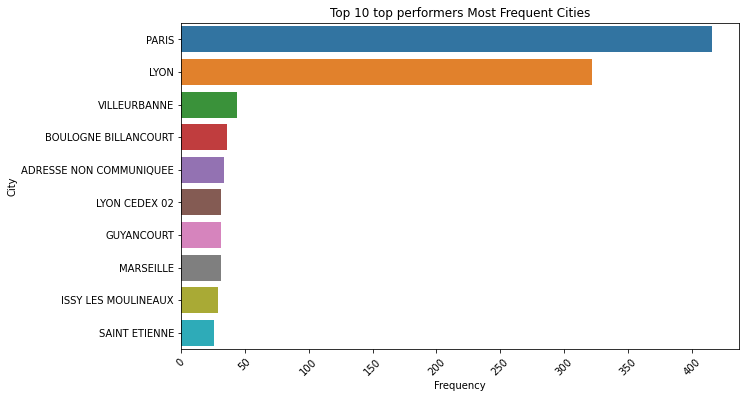

In [264]:
# Calculate the frequency of each city
city_counts = top_performers['City'].value_counts()

# Select the top 10 most frequent cities
top_10_cities = city_counts.head(10)

# Create a bar plot for the top 10 most frequent cities using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_cities.values, y=top_10_cities.index)
plt.xlabel('Frequency')
plt.ylabel('City')
plt.title('Top 10 top performers Most Frequent Cities')
plt.xticks(rotation=45)
plt.show()

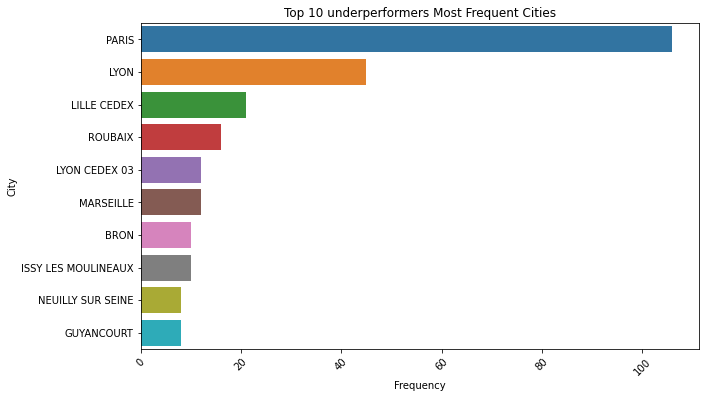

In [265]:
# Calculate the frequency of each city
city_counts = under_performers['City'].value_counts()

# Select the top 10 most frequent cities
top_10_cities = city_counts.head(10)

# Create a bar plot for the top 10 most frequent cities using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_cities.values, y=top_10_cities.index)
plt.xlabel('Frequency')
plt.ylabel('City')
plt.title('Top 10 underperformers Most Frequent Cities')
plt.xticks(rotation=45)
plt.show()

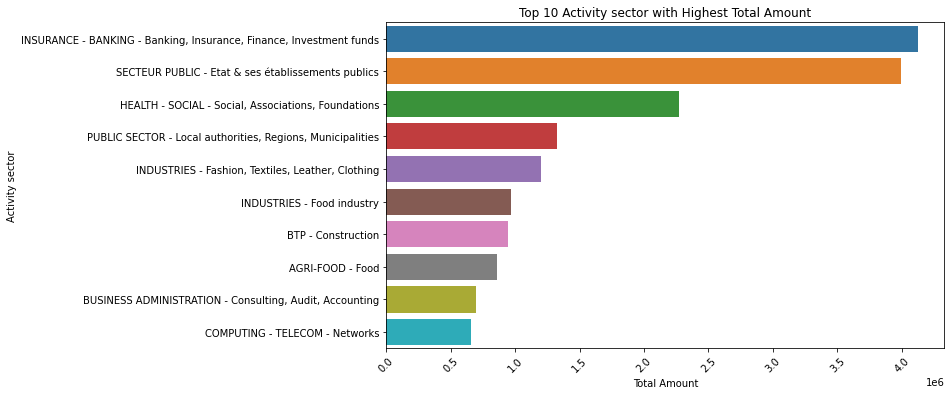

In [266]:
#Top performers
city_sum = top_performers.groupby("Activity sector")["Amount"].sum()

# Sort the cities by the total amount in descending order
sorted_city_sum = city_sum.sort_values(ascending=False)

# Select the top 10 cities with the highest amounts
top_10_cities = sorted_city_sum.head(10)

# Create a bar plot for the top 10 cities using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_cities.values, y=top_10_cities.index)
plt.xlabel('Total Amount')
plt.ylabel('Activity sector')
plt.title('Top 10 Activity sector with Highest Total Amount')
plt.xticks(rotation=45)
plt.show()

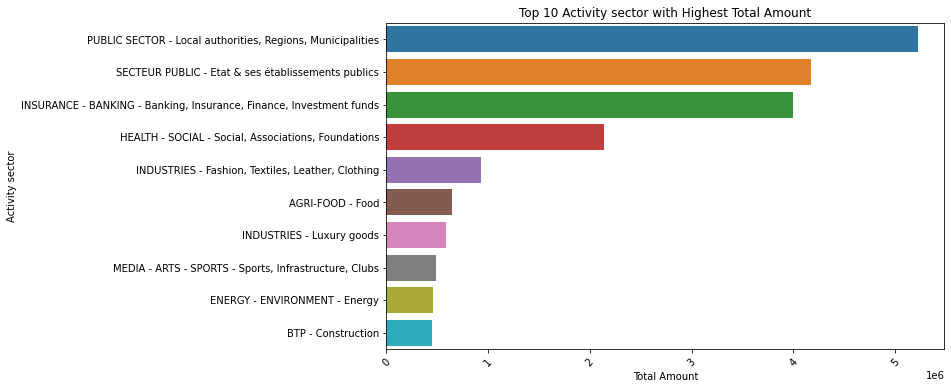

In [267]:
#Under performers
city_sum = under_performers.groupby("Activity sector")["Amount"].sum()

# Sort the cities by the total amount in descending order
sorted_city_sum = city_sum.sort_values(ascending=False)

# Select the top 10 cities with the highest amounts
top_10_cities = sorted_city_sum.head(10)

# Create a bar plot for the top 10 cities using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_cities.values, y=top_10_cities.index)
plt.xlabel('Total Amount')
plt.ylabel('Activity sector')
plt.title('Top 10 Activity sector with Highest Total Amount')
plt.xticks(rotation=45)
plt.show()

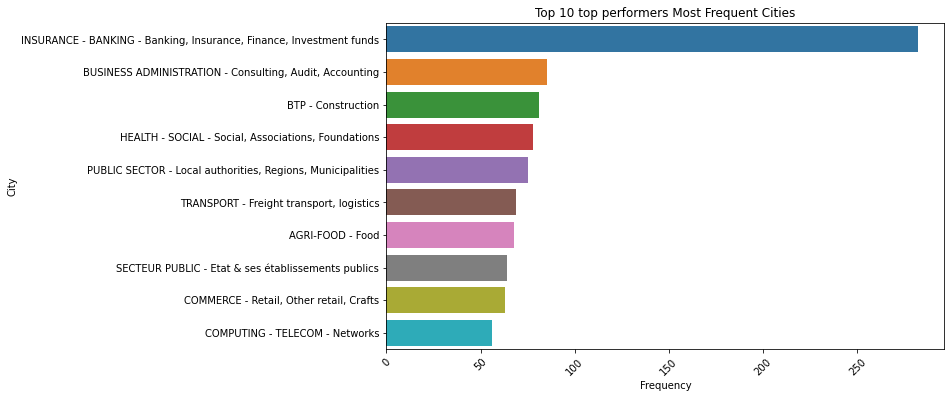

In [268]:
# Calculate the frequency of each city
sector_counts = top_performers['Activity sector'].value_counts()

# Select the top 10 most frequent cities
top_10_sector = sector_counts.head(10)
sector_counts
# Create a bar plot for the top 10 most frequent cities using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_sector.values, y=top_10_sector.index)
plt.xlabel('Frequency')
plt.ylabel('City')
plt.title('Top 10 top performers Most Frequent Cities')
plt.xticks(rotation=45)
plt.show()

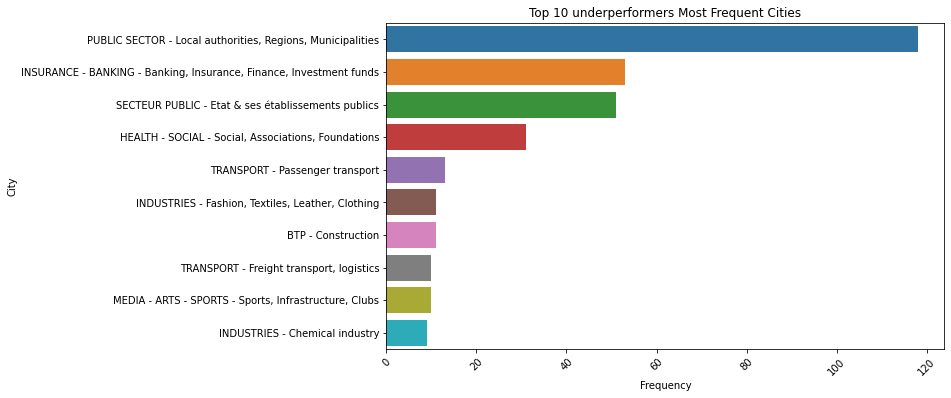

In [269]:
# Calculate the frequency of each city
sector_counts = under_performers['Activity sector'].value_counts()

# Select the top 10 most frequent cities
top_10_sector = sector_counts.head(10)
sector_counts
# Create a bar plot for the top 10 most frequent cities using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_sector.values, y=top_10_sector.index)
plt.xlabel('Frequency')
plt.ylabel('City')
plt.title('Top 10 underperformers Most Frequent Cities')
plt.xticks(rotation=45)
plt.show()

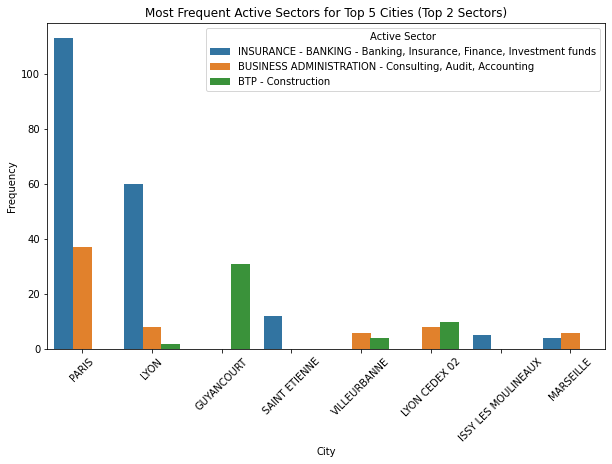

In [282]:
# Calculate the frequency of each city and each active sector
city_counts = top_performers['City'].value_counts()
sector_counts = top_performers['Activity sector'].value_counts()

# Select the top 5 cities and the top 2 sectors (most frequent)
top_5_cities = city_counts.head(10).index
top_2_sectors = sector_counts.head(3).index

# Filter the DataFrame to include only the data for the top 5 cities and top 2 sectors
df_top_cities_sectors = top_performers[top_performers['City'].isin(top_5_cities) & top_performers['Activity sector'].isin(top_2_sectors)]

# Create a count plot to visualize the most frequent active sectors for the top 5 cities
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_cities_sectors, x='City', hue='Activity sector', hue_order=top_2_sectors)
plt.xlabel('City')
plt.ylabel('Frequency')
plt.title('Most Frequent Active Sectors for Top 5 Cities (Top 2 Sectors)')
plt.legend(title='Active Sector', loc='upper right')
plt.xticks(rotation=45)
plt.show()



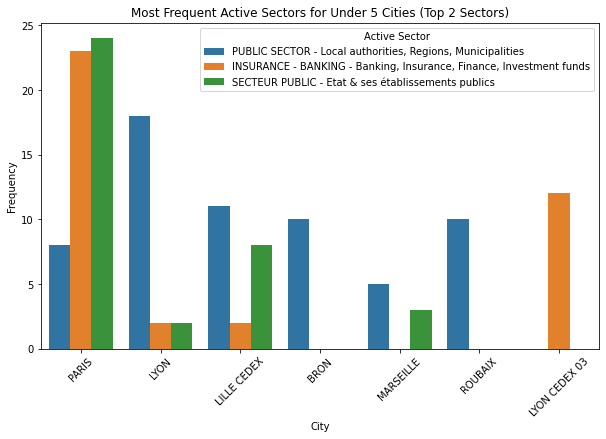

In [283]:
# Calculate the frequency of each city and each active sector
city_counts = under_performers['City'].value_counts()
sector_counts = under_performers['Activity sector'].value_counts()

# Select the top 5 cities and the top 2 sectors (most frequent)
top_5_cities = city_counts.head(10).index
top_2_sectors = sector_counts.head(3).index

# Filter the DataFrame to include only the data for the top 5 cities and top 2 sectors
df_top_cities_sectors = under_performers[under_performers['City'].isin(top_5_cities) & under_performers['Activity sector'].isin(top_2_sectors)]

# Create a count plot to visualize the most frequent active sectors for the top 5 cities
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_cities_sectors, x='City', hue='Activity sector', hue_order=top_2_sectors)
plt.xlabel('City')
plt.ylabel('Frequency')
plt.title('Most Frequent Active Sectors for Under 5 Cities (Top 2 Sectors)')
plt.legend(title='Active Sector', loc='upper right')
plt.xticks(rotation=45)
plt.show()



In [31]:
items_opp = pd.read_excel('Items and Opportunities.xlsx')

In [32]:
non_stock_items = pd.read_excel('Non-Stock Items.xlsx')


In [152]:
oppXbusaccount.to_csv("Final_merge.csv", index=False)

In [284]:
# Calculate the frequency of each city and each active sector
city_counts = under_performers['City'].value_counts()
sector_counts = under_performers['City'].group_by(['Activity sector'].value_counts())

# Select the top 5 cities and the top 2 sectors (most frequent)
top_5_cities = city_counts.head(10).index
top_2_sectors = sector_counts.head(3).index

# Filter the DataFrame to include only the data for the top 5 cities and top 2 sectors
df_top_cities_sectors = under_performers[under_performers['City'].isin(top_5_cities) & under_performers['Activity sector'].isin(top_2_sectors)]

# Create a count plot to visualize the most frequent active sectors for the top 5 cities
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_cities_sectors, x='City', hue='Activity sector', hue_order=top_2_sectors)
plt.xlabel('City')
plt.ylabel('Frequency')
plt.title('Most Frequent Active Sectors for Under 5 Cities (Top 2 Sectors)')
plt.legend(title='Active Sector', loc='upper right')
plt.xticks(rotation=45)
plt.show()



AttributeError: 'Series' object has no attribute 'group_by'